   # Ecommerce Portfolio (Data Analytics) Project Based On Python & SQL 

In [4]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'geolocation'),
    ('payments.csv', 'payments'),
    ('order_items.csv','order_items')# Added payments.csv for specific handling
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Uddeshay@123',
    database='ecommerce'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'C:/Users/Uddeshay Srivastava/OneDrive/Desktop/ecommerce'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()


Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Processing sellers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Processing products.csv
NaN values before replacement:
product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
prod

In [2]:
pip install mysql-connector-python





Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for mysql-connector-python from https://files.pythonhosted.org/packages/5f/c3/b4c36fbc65c119fca83f258557573d8cd296da5e198d3752c669f8e871e2/mysql_connector_python-9.0.0-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/14.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.3 MB ? eta -:--:--
    --------------------------------------- 0.2/14.3 MB 3.6 MB/s eta 0:00:04
   - -------------------------------------- 0.6/14.3 MB 5.4 MB/s eta 0:00:03
   -- ------------------------------------- 1.0/14.3 MB 6.3 MB/s eta 0:00:03
   --- ------------------------------------ 1.4/14.3 MB 7.0 MB/s eta 0:00:02
   ----- ---------------------------------- 1.9/14.3 MB 7.6 MB/s eta 0:00:02
   ------ --------------------------------- 2.4/14.3 MB 8.1 MB/s eta 0:00:02
   -------- ------------------------------- 2.9/14.3 MB 8.5 MB/s eta 0:00:02
   --

In [6]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

db=mysql.connector.connect(host="localhost",
                          username="root",
                          password="Uddeshay@123",
                          database="ecommerce")

cur=db.cursor()

In [20]:
# List all unique cities where customers are located
query= """select distinct customer_city from customers"""

cur.execute(query)

data=cur.fetchall()

#if print all data then write data 
# i just want to print only 5 data then create dataframe and print data 5
df=pd.DataFrame(data)
df.head()

,0
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas


In [9]:
# Count the number of orders placed in 2017
query= """select count(order_id) from orders where year (order_purchase_timestamp)=2017 """

cur.execute(query)

data=cur.fetchall()

"total orders placed in 2017 are",data[0][0]

('total orders placed in 2017 are', 45101)

In [13]:
# Find the total sales per category

query= """select products.product_category category,round(sum(payments.payment_value),2 )sales 
from products
join order_items
on products.product_id=order_items.product_id
join payments
on payments.order_id=order_items.order_id
group by category


"""

cur.execute(query)

data=cur.fetchall()

data

[('perfumery', 506738.66),
 ('Furniture Decoration', 1430176.39),
 ('telephony', 486882.05),
 ('Fashion Bags and Accessories', 218158.28),
 ('bed table bath', 1712553.67),
 ('automotive', 852294.33),
 ('computer accessories', 1585330.45),
 ('housewares', 1094758.13),
 ('babies', 539845.66),
 ('toys', 619037.69),
 ('Furniture office', 646826.49),
 ('Cool Stuff', 779698.0),
 ('HEALTH BEAUTY', 1657373.12),
 ('pet Shop', 311268.97),
 ('General Interest Books', 64694.76),
 ('stationary store', 317440.07),
 ('Watches present', 1429216.68),
 ('PCs', 279121.55),
 ('climatization', 91170.66),
 ('Construction Tools Construction', 241475.63),
 ('sport leisure', 1392127.56),
 ('Bags Accessories', 187151.29),
 ('electronics', 259857.1),
 ('Casa Construcao', 136645.29),
 ('Games consoles', 195480.38),
 ('home appliances', 95532.27),
 ('Garden tools', 838280.75),
 ('Agro Industria e Comercio', 118730.61),
 (None, 252801.71),
 ('audio', 60324.62),
 ('technical books', 24915.44),
 ('Construction Tools 

In [16]:
#Calculate the percentage of orders that were paid in installments
query= """select (sum(case when payment_installments>=1 then 1 else 0 end))/count(*)*100 from payments"""

cur.execute(query)

data=cur.fetchall()

"the percentage of orders that were paid in installments is ",data[0][0]


('the percentage of orders that were paid in installments is ',
 Decimal('99.9981'))

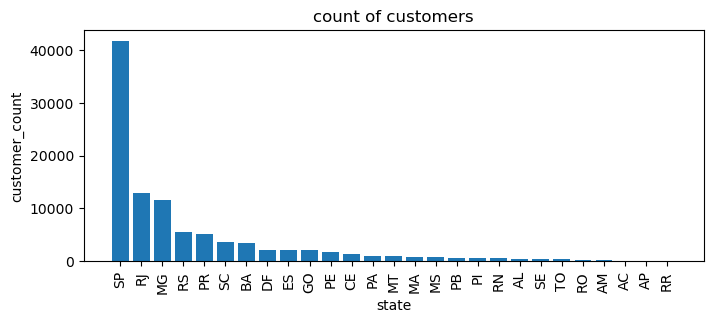

In [30]:
# Count the number of customers from each state
query= """select customer_state,count(customer_id)
from customers
group by customer_state


"""

cur.execute(query)

data=cur.fetchall()

#if print the data then write data
#if wants to create dataframe and visualization then
df=pd.DataFrame(data,columns=["state","customer_count"])
df=df.sort_values(by="customer_count",ascending=False)
plt.figure(figsize=(8,3))
plt.bar(df["state"],df["customer_count"])
plt.xticks(rotation=90)
plt.xlabel("state")
plt.ylabel("customer_count")
plt.title("count of customers")
plt.show()


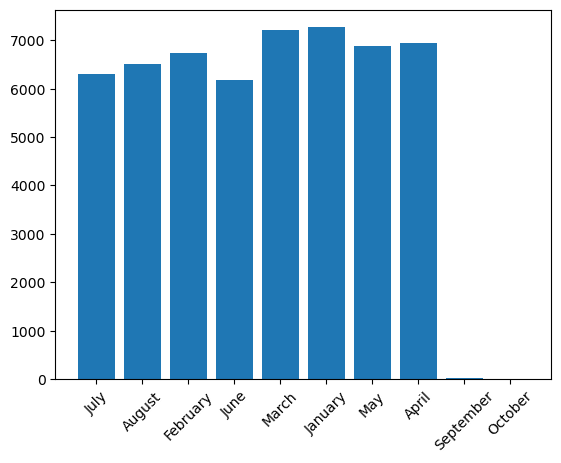

In [29]:
# Calculate the number of orders per month in 2018
query= """select monthname(order_purchase_timestamp) months,count(order_id) order_count 
from orders 
where year(order_purchase_timestamp) =2018

group by months

"""

cur.execute(query)

data=cur.fetchall()
#data   
df=pd.DataFrame(data,columns=["months","order_count"])
o=["January","February","March","April","May","June","July","August","September","October",]

plt.bar(df["months"],df["order_count"])
plt.xticks(rotation=45)
plt.show()


In [42]:
# Find the average number of products per order, grouped by customer city
query= """ with count_per_order as

(select orders.order_id,orders.customer_id,count(order_items.order_id)as oc
from orders
join order_items
on orders.order_id=order_items.order_id
group by orders.order_id,orders.customer_id)

select customers.customer_city,round(avg(count_per_order.oc),2) average_orders
from customers 
join count_per_order
on customers.customer_id=count_per_order.customer_id
group by customers.customer_city;










"""



cur.execute(query)

data=cur.fetchall()
df=pd.DataFrame(data,columns=["customer city","average product per orders "])
df.head(10)

,customer city,average product per orders
0,sao jose dos campos,1.14
1,indaial,1.12
2,treze tilias,1.27
3,sao paulo,1.16
4,rio de janeiro,1.15
5,mario campos,1.33
6,guariba,1.00
7,cuiaba,1.20
8,franca,1.25
9,tocos,1.00


In [57]:
#Calculate the percentage of total revenue contributed by each product category

query= """select upper (products.product_category) category,
round((sum(payments.payment_value)/(select sum(payment_value) from payments))*100,2) sales_percentage
from products join order_items
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by category order by sales_percentage desc


"""

cur.execute(query)

data=cur.fetchall()

df=pd.DataFrame(data,columns=["category","percentage distribution"])
df.head(5)

,category,percentage distribution
0,BED TABLE BATH,10.70
1,HEALTH BEAUTY,10.35
2,COMPUTER ACCESSORIES,9.90
3,FURNITURE DECORATION,8.93
4,WATCHES PRESENT,8.93


In [68]:
#Identify the correlation between product price and the number of times a product has been purchased
import numpy as np
query= """select products.product_category,

count(order_items.product_id),
round(avg(order_items.price),2) 
from products
join order_items
on products.product_id=order_items.product_id
group by products.product_category

"""

cur.execute(query)

data=cur.fetchall()
#data
df=pd.DataFrame(data,columns=["category","order_count","price"])
arr1=df["order_count"]
arr2=df["price"]
a=np.corrcoef([arr1,arr2])
print("the correlation between price and number of times a product has beeen purchased is",a[0][-1])

the correlation between price and number of times a product has beeen purchased is -0.10631514167157562


In [75]:
# Calculate the moving average of order values for each customer over their order history
query= """select customer_id,order_purchase_timestamp,payment,
avg(payment) over(partition by customer_id  order by order_purchase_timestamp
rows between 2 preceding and current row) as mov_avg

from 

(select orders.customer_id,orders.order_purchase_timestamp,
payments.payment_value as payment
from payments 
join orders
on payments.order_id=orders.order_id ) as a


"""

cur.execute(query)

data=cur.fetchall()

df=pd.DataFrame(data)
df.head(5)


,0,1,2,3
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.350006
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.010002


In [82]:
# Calculate the cumulative sales per month for each year

query= """ select years,months,payment,sum(payment)
over(order by years,months) cumulative_sales
from
(select year(orders.order_purchase_timestamp) as years,
month(orders.order_purchase_timestamp) as months,
round(sum(payments.payment_value),2) as payment 
from orders
join payments

on orders.order_id=payments.order_id
group by years,months 
order by years,months) as a"""
cur.execute(query)

data=cur.fetchall()
df=pd.DataFrame(data)
df



,0,1,2,3
0,2016,9,252.24,252.24
1,2016,10,59090.48,59342.72
2,2016,12,19.62,59362.34
3,2017,1,138488.04,197850.38
4,2017,2,291908.01,489758.39
5,2017,3,449863.60,939621.99
6,2017,4,417788.03,1357410.02
7,2017,5,592918.82,1950328.84
8,2017,6,511276.38,2461605.22
9,2017,7,592382.92,3053988.14


In [87]:
# Calculate the year-over-year growth rate of total sales

query="""with a as (select year(orders.order_purchase_timestamp) as years,

round(sum(payments.payment_value),2) as payment 
from orders
join payments

on orders.order_id=payments.order_id
group by years
order by years)

select years,((payment-lag(payment,1) over (order by years))/
lag(payment,1)over (order by years)) * 100 from a """

cur.execute(query)

data=cur.fetchall()
df=pd.DataFrame(data,columns=["years","yoy % growth"])
df


,years,yoy % growth
0,2016,NaN
1,2017,12112.703761
2,2018,20.000924
